In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt




ModuleNotFoundError: No module named 'cv2'

175104
True
256
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   1.   1.   2.   2.   3.   4.
   5.   7.   9.  11.  14.  18.  23.  29.  36.  44.  53.  63.  74.  83.
  92. 101. 108. 116. 123. 130. 137. 144. 150. 157. 163. 170. 176. 182.
 188. 193. 198. 202. 206. 210. 213. 217. 220. 223. 225. 227. 229. 231.
 232. 234. 235. 237. 238. 239. 240. 241. 242. 242. 243. 244. 244. 245.
 245. 246. 246. 247. 247. 248. 248. 249. 249. 250. 250. 251. 

True

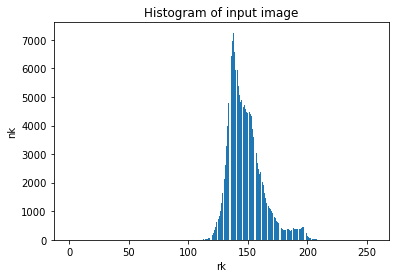

In [36]:
def read_grayscales(img):
    img = cv2.imread(img,0)
    cv2.imwrite("readimage.png",img)
    return img
def calculate_histogram_test(img, L):
    image_flatten = img.flatten()
    print(len(image_flatten))
    bin_statistic = np.bincount(image_flatten, minlength = L)
    return bin_statistic
def calculate_histogram(img, L):
    image_flatten = img.flatten()
    new_list = np.zeros(L)
    for each_pixel in image_flatten:
        new_list[each_pixel] += 1
    return new_list 
        

def histogram_show(hist):
    print(len(hist))
    plt.bar(range(len(hist)), hist)
    plt.xlabel("rk")
    plt.ylabel("nk")
    plt.title("Histogram of input image")
    plt.savefig("Histogram_input")
def calculate_prob(hist,total_pixels):
    return [values_each_bin/total_pixels for values_each_bin in hist]

# def calculate_sk(hist,L, total_number):
#     new_list = np.zeros(L) 
#     for index, each_value in enumerate(hist):
#         calculate_sum = sum(hist[:index+1])
#         new_list[index] = round((L-1)/total_number * calculate_sum)
#     return new_list

def calculate_sk(cal_pr, L):
    new_list = np.zeros(L)
    for index, each_pr in enumerate(cal_pr):
        cal_result = (L-1) * sum(cal_pr[0: index+1])
        new_list[index] = round(cal_result)
    #     if index ==0:
    #         cal_result = cal_pr[0]
    #         cal_result = (L - 1) * cal_result
    #         new_list[index] = cal_result
    #     else:
    #         cal_result = cal_pr[index]
    #         cal_result = new_list[index-1] + (L-1) * cal_result
    #         new_list[index] = cal_result
    # returned_result = np.zeros(L)
    # for index, i in enumerate(new_list):
    #     returned_result[index] = round(i)
    # return returned_result
    return new_list  
    
def calculate_mapping(hist_sk,hist):
    new_list = np.zeros(len(hist))
    # print(hist_sk)
    for index, mapped_bin in enumerate(hist_sk):
        pixels_value = hist[index]
        # print(pixels_value)
        new_list[int(mapped_bin)] += pixels_value
        # new_list[int(mapped_bin)] += pixels_value
    return new_list   

def new_image(img, sk):
    height, width = img.shape
    new_img = np.zeros(img.shape, dtype = 'uint8')
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            new_img[i, j] = sk[img[i,j]]
    return new_img


img_name = 'HawkesBay.jpeg'
img = read_grayscales(img_name)
# cv2.imshow("original image", img)
# print(img.shape)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

# calculate the histogram from the imput image
histogram_statis_test = calculate_histogram_test(img, 256)
# print(histogram_statis_test)
# print(len(histogram_statis_test))
# print(sum(histogram_statis_test))
histogram_statis = calculate_histogram(img, 256)
# print(histogram_statis)
print((histogram_statis == histogram_statis_test).all())
histogram_show(histogram_statis)
tp = img.shape[0]*img.shape[1]
pr = calculate_prob(histogram_statis, tp)
# print(pr)
# print(sum(pr))
# sk = calculate_sk(histogram_statis, 256, img.shape[0]*img.shape[1])
sk = calculate_sk(pr, 256)
print(sk)
# mapped_nk = calculate_mapping(sk, histogram_statis)
# print(mapped_nk)
new_img = new_image(img, sk)
cv2.imwrite("he_newimage.png",new_img)
# cv2.imshow("mapped image", new_img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
# histogram_show(mapped_nk)
# new_hist = calculate_histogram(new_img,256)
# histogram_show(new_hist)


175104
True
256


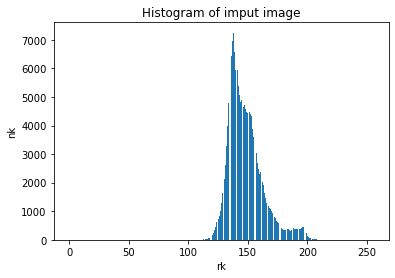

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   1.   1.   2.   2.   3.   4.
   5.   7.   9.  11.  14.  18.  23.  29.  36.  44.  53.  63.  74.  83.
  92. 101. 108. 116. 123. 130. 137. 144. 150. 157. 163. 170. 176. 182.
 188. 193. 198. 202. 206. 210. 213. 217. 220. 223. 225. 227. 229. 231.
 232. 234. 235. 237. 238. 239. 240. 241. 242. 242. 243. 244. 244. 245.
 245. 246. 246. 247. 247. 248. 248. 249. 249. 250. 250. 251. 252. 252.
 253. 

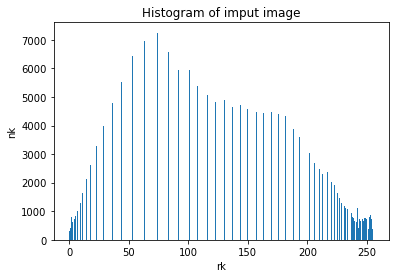

In [18]:
# def read_grayscales(img):
#     img = cv2.imread(img,0)
#     return img
# def calculate_histogram_test(img, L):
#     image_flatten = img.flatten()
#     print(len(image_flatten))
#     bin_statistic = np.bincount(image_flatten, minlength = L)
#     return bin_statistic
# def calculate_histogram(img, L):
#     image_flatten = img.flatten()
#     new_list = np.zeros(L)
#     for each_pixel in image_flatten:
#         new_list[each_pixel] += 1
#     return new_list 
        

# def histogram_show(hist):
#     print(len(hist))
#     plt.bar(range(len(hist)), hist)
#     plt.xlabel("rk")
#     plt.ylabel("nk")
#     plt.title("Histogram of imput image")
#     plt.show()
# def calculate_prob(hist,total_pixels):
#     return [values_each_bin/total_pixels for values_each_bin in hist]
# def calculate_sk(hist,L, total_number):
#     new_list = np.zeros(L) 
#     for index, each_value in enumerate(hist):
#         calculate_sum = sum(hist[:index+1])
#         new_list[index] = round((L-1)/total_number * calculate_sum)
#     return new_list

# def calculate_sk(pr, L):
#     new_list = np.zeros(L)
#     for index, each_value in 


# def calculate_mapping(hist_sk,hist):
#     new_list = np.zeros(len(hist))
#     # print(hist_sk)
#     for index, mapped_bin in enumerate(hist_sk):
#         pixels_value = hist[index]
#         # print(pixels_value)
#         new_list[int(mapped_bin)] += pixels_value
#     return new_list   

# def new_image(img, sk):
#     height, width = img.shape
#     new_img = np.zeros(img.shape, dtype = 'uint8')
#     for i in range(img.shape[0]):
#         for j in range(img.shape[1]):
#             new_img[i, j] = sk[img[i,j]]
#     return new_img
# img_name = 'HawkesBay.jpeg'
# img = read_grayscales(img_name)
# # cv2.imshow("original image", img)
# # print(img.shape)
# # cv2.waitKey(0)
# # cv2.destroyAllWindows()

# # calculate the histogram from the imput image
# histogram_statis_test = calculate_histogram_test(img, 256)
# # print(histogram_statis_test)
# # print(len(histogram_statis_test))
# # print(sum(histogram_statis_test))
# histogram_statis = calculate_histogram(img, 256)
# # print(histogram_statis)
# print((histogram_statis == histogram_statis_test).all())
# histogram_show(histogram_statis)
# pr = calculate_prob(histogram_statis, img.shape[0]*img.shape[1])
# # print(pr)
# # print(sum(pr))
# sk = calculate_sk(histogram_statis, 256, img.shape[0]*img.shape[1])
# print(sk)
# mapped_nk = calculate_mapping(sk, histogram_statis)
# # print(mapped_nk)
# new_img = new_image(img, sk)
# cv2.imwrite("new_image.png", new_img)
# # cv2.imshow("mapped image", new_img)
# # cv2.waitKey(0)
# # cv2.destroyAllWindows()
# histogram_show(mapped_nk)


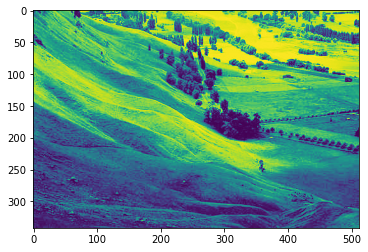

In [13]:
dst = cv2.equalizeHist(img)

plt.figure("image")
plt.imshow(dst)
plt.show()

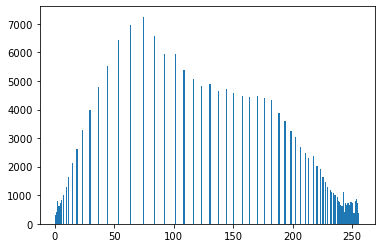

In [16]:
plt.hist(dst.ravel(), 256, [0, 256])
plt.show()

In [ ]:
plt.hist(img.ravel(), )

In [ ]:
a = [1, 2, 3, 4, 5, 6, 7]
print(a[0:1])